In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
 user_data = pd.read_csv('/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/3_user_data.csv', sep = ',')

In [26]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [27]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [32]:
logs = pd.read_csv('/Users/79295/Desktop/GITHUB/Analytical-practice/datasets/3_logs.csv', parse_dates = ['time'],unicode =  sep = ',')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [33]:
logs.dtypes

client       int64
success       bool
platform    object
time        object
dtype: object

In [51]:
# 2.	Какой клиент совершил больше всего успешных операций? (success == True)

In [50]:
logs.query('success == True') \
    .groupby('client') \
    .agg({"success":"count"}) \
    .rename(columns={"success":"success_count"}) \
    .sort_values(by='success_count', ascending = False) \
    .query('success_count == 41')

,success_count
client,
12179,41
61468,41
52870,41
61473,41
92584,41
82563,41
78349,41
36165,41
28719,41


In [52]:
# 3.	С какой платформы осуществляется наибольшее количество успешных операций?

In [53]:
logs.query('success == True') \
    .groupby('platform') \
    .agg({"success":"count"}) \
    .rename(columns={"success":"platform_count"}) \
    .sort_values(by='platform_count', ascending = False)

,platform_count
platform,
phone,2019
computer,1090
tablet,180


In [57]:
logs.query('success == True').value_counts('platform')

platform
phone       2019
computer    1090
tablet       180
dtype: int64

In [58]:
# 4.	Какую платформу предпочитают премиумные клиенты?

In [63]:
merge_df = logs.merge(user_data, on= 'client')
merge_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [64]:
merge_df.query('premium == True').value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

In [65]:
# 5.	Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [109]:
premium_user_age = user_data\
    .groupby('age', as_index=False) \
    .agg({"client":"count"})
premium_user_age.head()

,age,client
0,20,54
1,21,56
2,22,57
3,23,49
4,24,51


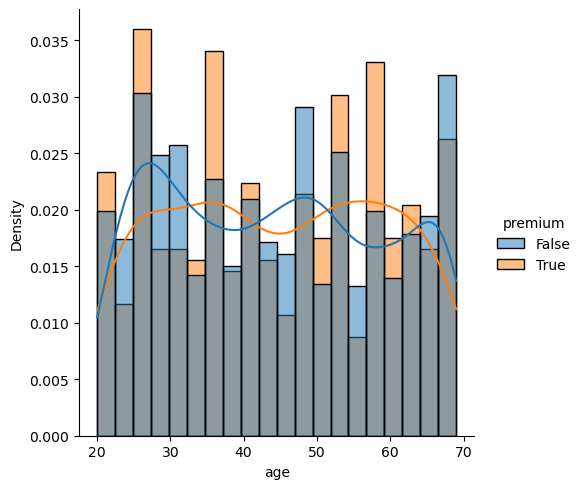

In [108]:
sns.displot(data=merge_df, x='age', 
            hue='premium', 
            kde=True, 
            kind='hist', 
            stat='density', 
            common_norm=False, 
            bins=20)
sns.despine()

In [110]:
# 6.	Постройте график распределения числа успешных операций

In [140]:
success_counts = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({"success":"count"}) \
    .rename(columns={"success":"success_count"}) \
    .groupby('success_count', as_index=False) \
    .agg({"client":"count"})
success_counts    

,success_count,client
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


<AxesSubplot:xlabel='success_count', ylabel='client'>

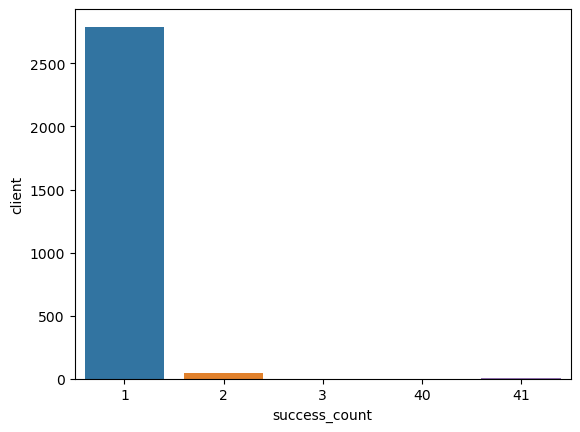

In [141]:

sns.barplot(data=success_counts, x="success_count", y="client")

In [142]:
# 7.	Визуализируйте число успешных операций, сделанных на платформе computer, 
# в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций).
# Клиенты какого возраста совершили наибольшее количество успешных действий?

In [164]:
success_comp_counts = merge_df.query("success == True and platform == 'computer'" ) \
    .groupby('age', as_index=False)\
    .agg({"success":"count"}) \
    .rename(columns={"success":"success_comp_count"})
success_comp_counts.head()  

,age,success_comp_count
0,20,11
1,21,15
2,22,8
3,23,15
4,24,26


<AxesSubplot:xlabel='age', ylabel='success_comp_count'>

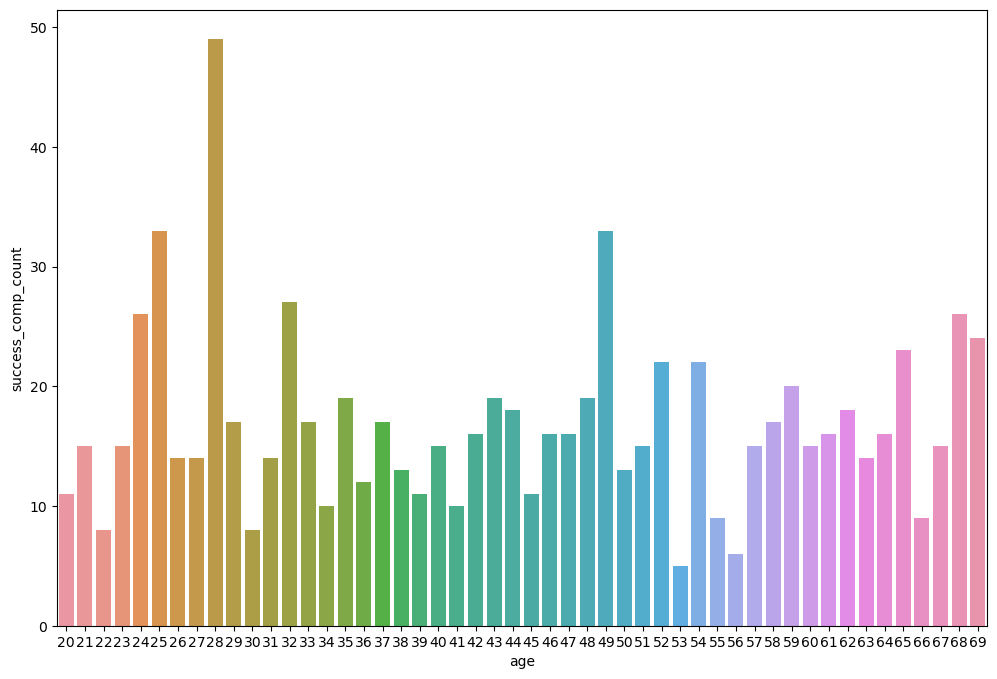

In [171]:
plt.figure(figsize=(12,8))
sns.barplot(data=success_comp_counts, x="age", y="success_comp_count")

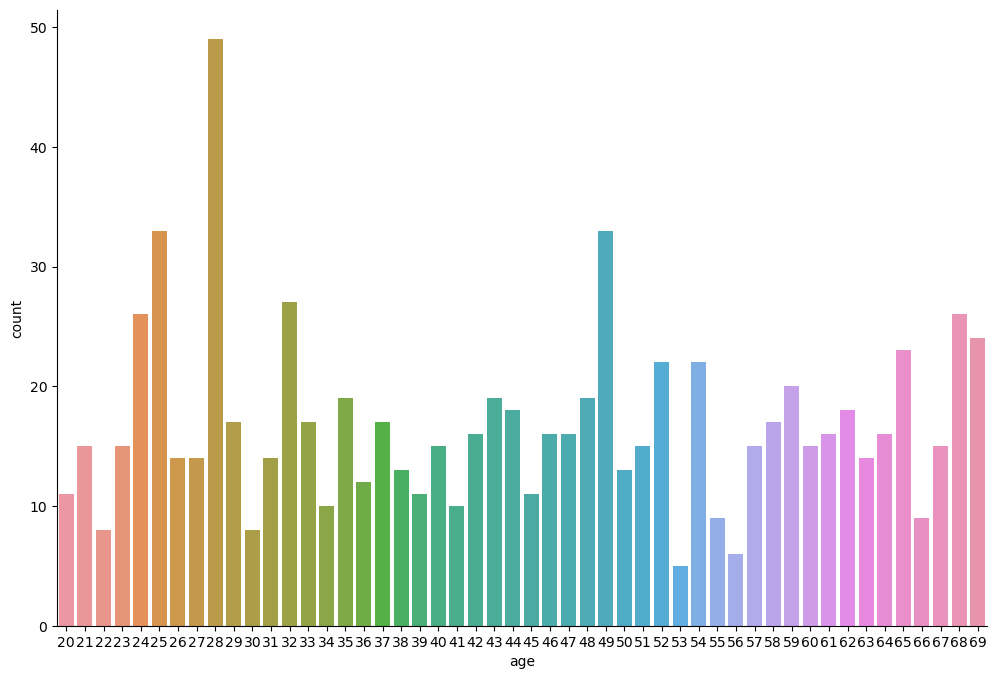

In [173]:
plt.figure(figsize=(12,8))
sns.countplot(data=merge_df.loc[(merge_df.platform == 'computer')
                                   & (merge_df.success == True)], 
             x='age')
sns.despine()

In [174]:
# Клиенты в возрасте 28 лет совершили наибольшее число успешных операций